In [1]:
import numpy as np
import dipoles
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wavelength_nm = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0



print(dipoles.initial_field(wavelength_nm, angle, 1, eps_Au, point, phase, a))


p, m =  dipoles.calc_dipoles_v2(wavelength_nm, eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
print(np.round(p,39))

print(np.round(m,34))

# p2,m2 = dipoles.calc_dipoles(wavelength_nm, eps_Au, 40, R, eps_Si, point, angle, amplitude=1, phase=phase, a=a)

# print(np.round(p2,39))

# print(np.round(m2,34))


wl = np.linspace(600, 1200, 60)

Px=[]
Py=[]
Pz=[]
Mx=[]
My=[]
Mz=[]

# res = np.empty((3,len(wl)))
for i in tqdm(range(len(wl))):

    p,m =  dipoles.calc_dipoles_v2(wl[i], eps_Au, point, R, eps_Si, angle, amplitude=1, phase=phase, a=a, stop=STOP )
    Px.append(p[0])
    Py.append(p[1])
    Pz.append(p[2])
    Mx.append(m[0])
    My.append(m[1])
    Mz.append(m[2])

  

(array([[0.39240614-1.73135096j],
       [0.        +0.j        ],
       [0.13773195+0.02531449j]]), array([[ 0.        +0.j      ],
       [-0.00086508-0.000159j],
       [ 0.        +0.j      ]]))
[[ 2.00082283e-31+2.90870982e-31j]
 [ 0.00000000e+00+0.00000000e+00j]
 [-1.34214360e-32+2.58207550e-32j]]
[[ 0.00000000e+00+0.00000000e+00j]
 [-5.18961782e-24-2.06946777e-23j]
 [ 0.00000000e+00+0.00000000e+00j]]


  5%|▌         | 3/60 [00:02<00:38,  1.49it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:449: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  im_retval = quad(imfunc, a, b, args, full_output, epsabs,
 48%|████▊     | 29/60 [00:21<00:23,  1.34it/s]/Users/semyon_b/git/SPP_ANALYTICAL/.venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:446: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 60/60 [00:45<00:00,  1.32it/s]


In [16]:
import dipoles

alpha_e, aplha_h = dipoles.alpha_v2(800, 80, eps_Si)

alpha_e2, alpha_h2 = dipoles.get_alpha(80, eps_Si, 800)
print(alpha_e, alpha_e2)
print(aplha_h, alpha_h2)

(6.1023802877074116e-21+9.877096479669483e-22j) (4.5135448094540186e-32+6.047584929074367e-33j)
(2.166947325715558e-21+1.3637885343547598e-22j) (1.0578547833093139e-21+3.215309706930123e-23j)


In [23]:
wls = np.linspace(600,1200,100)
import dipoles
R = 14

alpha_v2 = []
eps_Si = frenel.get_interpolate('Si')
alpha_v1=[]

c_const = 299792458

eps0_cosnt = 1/(4*np.pi*c_const**2)*1e7


print(eps0_cosnt*dipoles.alpha_v2(800, R, eps_Si)[0])

for wl in wls:
    alpha_v2.append(dipoles.alpha_v2(wl, R, eps_Si))
    alpha_v1.append(dipoles.get_alpha(R, eps_Si, wl))
alpha_v2 = np.array(alpha_v2)
alpha_v1 = np.array(alpha_v1)

(2.475701975330382e-34+3.314602154522542e-37j)


(770.0, 820.0)

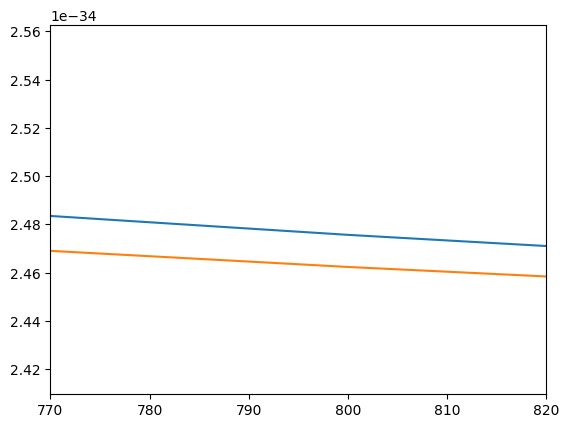

In [27]:
plt.plot(wls, eps0_cosnt* np.real(alpha_v2)[:,0])
#plt.plot(wls, eps0_cosnt*np.imag(alpha_v2)[:,0])
plt.plot(wls, np.real(alpha_v1)[:,0])
#plt.plot(wls, np.imag(alpha_v1)[:,0])
plt.xlim(770,820)

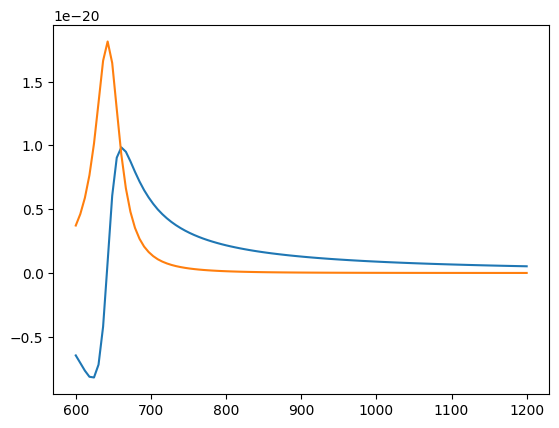

In [35]:
plt.plot(wls, np.real(alpha_v2)[:,1])
plt.plot(wls, np.imag(alpha_v2)[:,1])

In [3]:
dipoles = np.loadtxt('comsol/p sub 146 TM.txt', skiprows=8, delimiter=',')

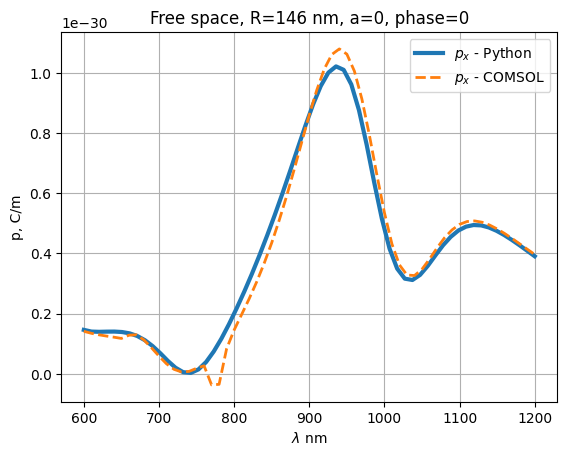

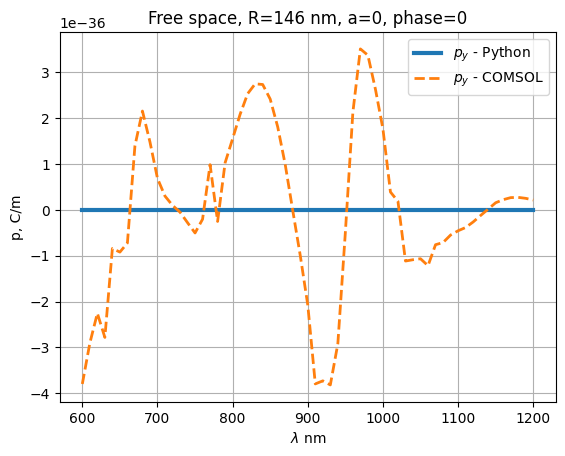

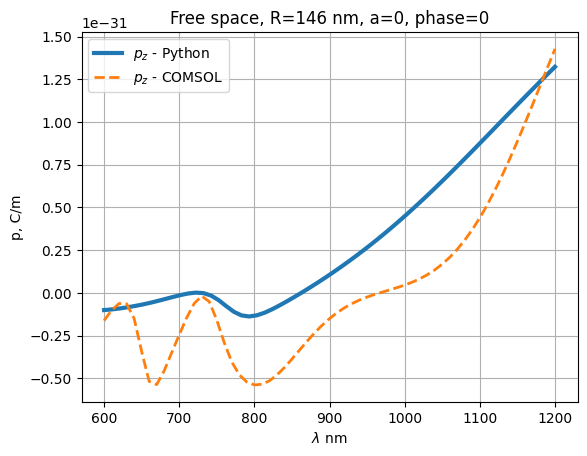

In [15]:
plt.plot(wl, np.real(Px), label='$p_x$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,1], label='$p_x$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
#plt.xlim(700,840)
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()


plt.plot(wl, np.real(Py), label='$p_y$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,2], label='$p_y$ - COMSOL', linestyle='dashed', lw=2)
plt.grid()
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()


plt.plot(wl, np.real(Pz), label ='$p_z$ - Python', lw=3)  
plt.plot(dipoles[:,0], dipoles[:,3], label='$p_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('p, C/m')
plt.legend()
plt.show()

In [5]:
mdipoles = np.loadtxt('comsol/m sub 146 TM.txt', skiprows=8, delimiter=',')

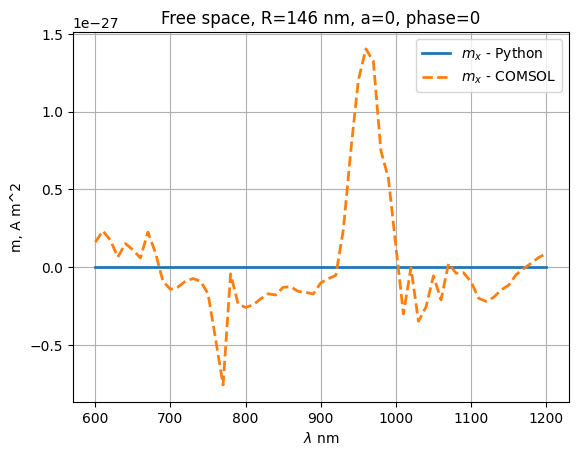

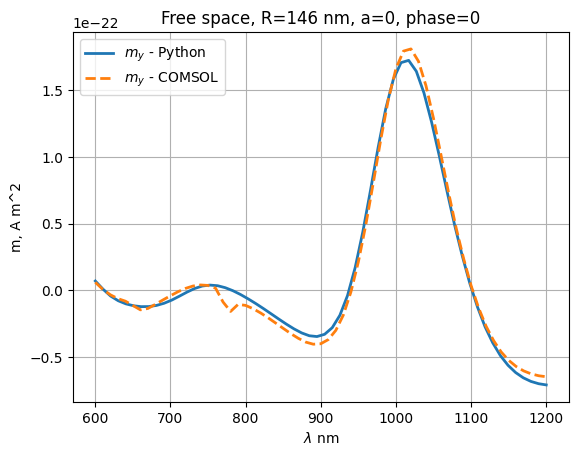

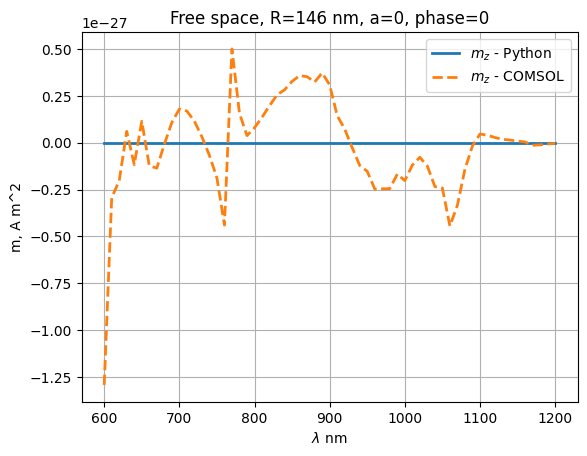

In [6]:
plt.plot(wl, np.real(Mx), label='$m_x$ - Python', lw=2) 
plt.plot(mdipoles[:,0], mdipoles[:,1], label='$m_x$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()
 
plt.plot(wl, np.real(My), label='$m_y$ - Python', lw=2)
plt.plot(mdipoles[:,0], mdipoles[:,2], label='$m_y$ - COMSOL', linestyle='dashed', lw=2) 
plt.grid()
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()
  
plt.plot(wl, np.real(Mz), label='$m_z$ - Python', lw=2)   
plt.plot(mdipoles[:,0], mdipoles[:,3], label='$m_z$ - COMSOL', linestyle='dashed', lw=2)  
plt.grid()
plt.title('Free space, R=146 nm, a=0, phase=0')
plt.xlabel('$\\lambda$ nm')
plt.ylabel('m, A m^2')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import force
import matplotlib.pyplot as plt
from tqdm import tqdm
import frenel
import dipoles

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0.5



print(dipoles.initial_field(wl, angle, 1, eps_Au, point, phase, a))


wls = np.linspace(600,1200, 50)
F_x = np.empty_like(wls)
F_y = np.empty_like(wls)
F_z = np.empty_like(wls)
for i in tqdm(range(len(wls))):
    F_x[i],F_y[i], F_z[i], _ = force.F(wls[i], eps_Au, point, R, eps_Si, angle,amplitude=1,phase=phase,a=a, stop=STOP)

(array([[0.27747304-1.22425j   ],
       [0.25039754-1.35334001j],
       [0.0973912 +0.01790005j]]), array([[ 0.00068853+0.00010798j],
       [-0.0006117 -0.00011243j],
       [ 0.0002809 -0.00151818j]]))


 48%|████▊     | 24/50 [00:52<00:57,  2.23s/it]c:\Users\borod\Desktop\SPP_ANALYTICAL\SPP_ANALYTICAL\.venv\Lib\site-packages\scipy\integrate\_quadpack_py.py:441: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
100%|██████████| 50/50 [01:51<00:00,  2.24s/it]


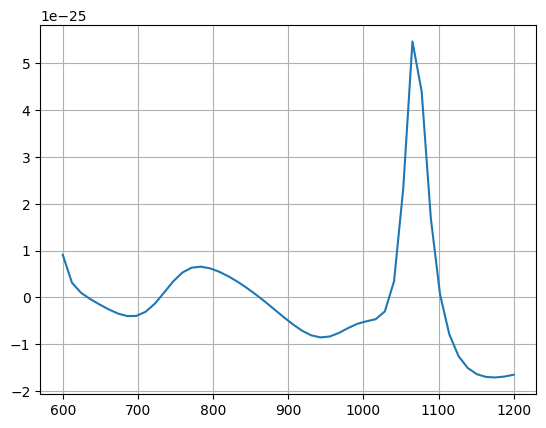

In [10]:
import matplotlib.pyplot as plt
plt.plot(wls, F_y)
plt.grid()

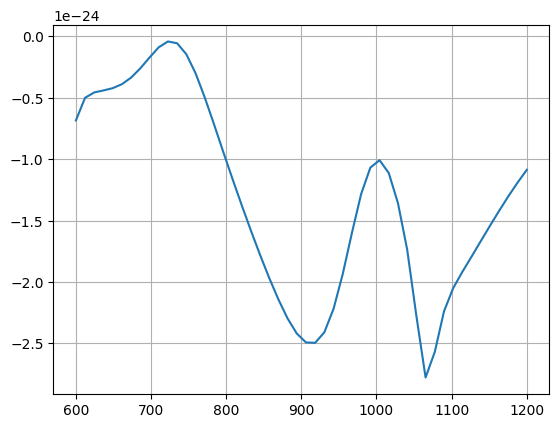

In [11]:
plt.plot(wls, F_x)
plt.grid()

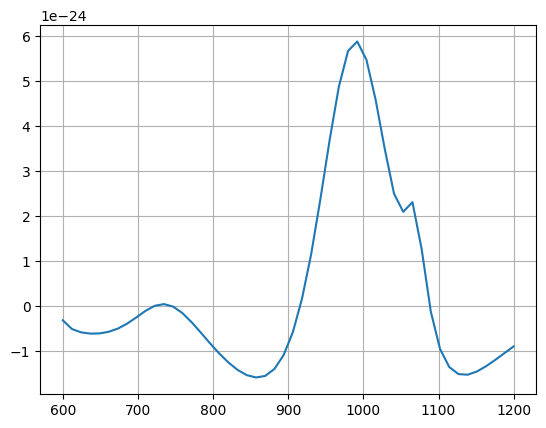

In [8]:
plt.plot(wls, F_z)
plt.grid()

In [4]:
import green_func
import frenel
import numpy as np
import matplotlib.pyplot as plt

eps_Au = frenel.get_interpolate('Au')
eps_Si = frenel.get_interpolate('Si')

wl = 800  # [nm]
STOP = 45
R = 146
dist = 20
point = [0,0,dist+R]
angle = 25*np.pi/180
phase = 0
a = 0


dy_Green_E_yz = []

# wls = np.linspace(600,1200,30)
# for wl in wls:
#     dy_Green_E_yz.append(green_func.dy_green_E_H_yz())

print(green_func.dz_green_E_H(wl, point[2], eps_Au, np.inf))

(array([[-1.13792717e+12+1.10183557e+12j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j, -1.13792717e+12+1.10183557e+12j,
         0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        -1.55132578e+12-1.72269781e+12j]]), array([[7.98068602e+11-1.48331780e+12j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 7.98068602e+11-1.48331780e+12j,
        0.00000000e+00+0.00000000e+00j],
       [0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
        8.71608647e+11+9.59733359e+11j]]))


Прислать параметры и дипольные моменты!